# Traveling salesman with GA 

### This notebook covers the creation of a Genetic Algorithm to tackle the TSP problem

Feel free to copy it and sugest improvements on github
https://github.com/jcanelhas/GAIntro

### Introduction to Genetic Algotithms (GA)

Genetic algorithms are a heuristic search and optimization technique that uses a mechanism inspired in the way living organisms pass their traits from one generation to the next. The genetic algorithm as we know it was first presented by John Holland in the book Adaptation in Natural and Artificial Systems.<br>
To create make an analogy with nature, so solutions are called individuals and a group of solutions is called a population.<br>
With a Darwinian approach, GAs try to mimic evolution and natural selection. Evolution is achieved by using operations that create change into the individuals and consequently to the population, the main mechanisms of evolution are: crossover and mutation. Natural selection is attained by classifying individuals using a fitness function; this function will evaluate how good the individual is and will affect the chance it has to pass traits to the next generation. The fitness function is highly dependent on the problem being solved.<br>
Genetic algorithms are appropriate for problems where an accurate solution (that may not be optimal) is needed and when there is no need for a real-time response.<br>
<br><br>__Advantages of GA.__<br><br>
Some benefits of Genetic algorithms are the ability to provide a very accurate result and usually provide an easy to understand solution to a problem, contrary to neural networks, where the inner workings are very hard to interpret.
<br><br>__Limitations of GA.__<br><br>
Some of the limitations of GA are: the cost of computing the fitness function, they are highly stochastic method, each run usually provides a different solution, so it is better to run several runs with the same parameters to obtain a solution, high dependence on the initial population that is randomly generated, high dependence on parameter settings, that is very hard to tweak, they do not guarantee to find the optimal solution.<br><br>
<hl>

### Module Import

The imports go here

In [1]:
#numpy 
import numpy as np

#some pretty plots
import matplotlib as plt

#notebook or inline 
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,8)

#general math and random imports
from math import sqrt
from random import randint
from random import random

#For some cool widgets
from ipywidgets import FloatProgress
from IPython.display import display

### Read the cities file

Read a text file into an array

200 cities read


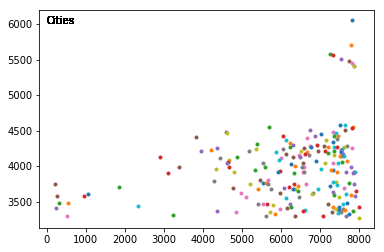

In [2]:
city_list=np.loadtxt('200.txt').astype(int)
print(str(len(city_list)) + " cities read")
#show the map
for city in city_list:
    plt.pyplot.plot(city[1],city[2],'.')
    plt.pyplot.text(1,6000,'Cities')
plt.pyplot.show()

### Set the initial parameters

In [3]:
#Number of individuals on a population
nindividuals=300
#Number of cities being processed
ncities=len(city_list)
#Tournmentsize
tournamentsize=10

#crossover and mutation probability
cx_probability=0.9
mx_probability=0.5

#maximum number of generations to run
max_iterations=1000

## Define general funtions

### Euclidean Distance

In [4]:
def euclidian_distance(x1,y1,x2,y2):
    dist = sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

In [5]:
#test the function
euclidian_distance(0,0,1,1)

1.4142135623730951

### Calculate fitness

In [6]:
def calculate_fitness(individual):
    fitness=0
    #First element
    fitness=euclidian_distance(city_list[individual[0]][1],city_list[individual[0]][2],
                               city_list[individual[1]][1],city_list[individual[0]][2])
    for i in range(1,len(individual)-1):
        fitness=fitness+euclidian_distance(city_list[individual[i]][1],city_list[individual[i]][2],
                                           city_list[individual[i+1]][1],city_list[individual[i+1]][2])
    return fitness

### Mutation

In [7]:
def mutate(individual):
    #reverse mutation
    init_pos=np.random.randint(0,len(individual))
    end_pos=np.random.randint(init_pos,len(individual)+1)
    mutated_individual= np.concatenate((individual[:init_pos],
                                        individual[init_pos:end_pos][::-1],
                                        individual[end_pos:]),axis=0)
    return mutated_individual

### Crossover

In [8]:
def crossover(individual1,individual2):
    splitpoint=randint(0,len(individual1)-1)
    result1=np.copy(individual1)
    result2=np.copy(individual2)
    currpos=splitpoint
    firstval=individual1[splitpoint]
    newpos=0
    
    cycleover=False
    
    while True:
         
            
        result1[currpos]=individual2[currpos]
        result2[currpos]=individual1[currpos]



        newpos=np.where(individual1==individual2[currpos])

        currval=individual2[currpos]

        if firstval==currval:#individual2[currpos]:

            cycleover=True        

        currpos=newpos
        if cycleover:
            break

   
    return(result1,result2)

### Tournament Selection

Tournament selections randomly picks a number of individuals and compares them, the one with the best fitness is selected. This method is fast compared to roulette wheel (and others )because there is no need to evaluate EVERY individual in the population.

In [9]:
def tournament_selection(pop, tournament_size):
    
    champion=population[np.random.randint(len(pop))]
    champion_fitness=calculate_fitness(champion)
    
    for i in range(0,tournament_size):
        tmpind=population[np.random.randint(len(pop))]
        tmpind_fitness=calculate_fitness(tmpind)
        if tmpind_fitness<champion_fitness:
            champion=tmpind[:]
            champion_fitness=tmpind_fitness
    return champion

### Initialization

In [10]:
population=np.zeros((nindividuals,ncities),dtype=int)
for individual in range(0,nindividuals):
    population[individual]=np.arange(ncities)
    np.random.shuffle(population[individual])

In [11]:
#lets see the population
population

array([[172,  48,  13, ...,   5, 112,  98],
       [ 37, 149,  57, ..., 173,   5, 145],
       [ 34, 179,  26, ..., 110,  53, 163],
       ..., 
       [198,  70, 102, ...,  41, 110, 194],
       [ 68,  19, 152, ..., 132,  61,  48],
       [ 21, 123,  95, ...,  89, 102,  32]])

In [12]:
def draw_scatter_plot(texto=''):
    ##prepare scatter
    xx=list()
    xx[:]=()
    yy=list()
    yy[:]=()

    best_individual=0
    best_individual_fitness= calculate_fitness(population[0])

    tot=0
    
    for i in range(0,nindividuals):
        cfit=calculate_fitness(population[i])
        tot=tot+cfit
        if cfit<best_individual_fitness:
            best_individual=i
            best_individual_fitness=calculate_fitness(population[i])


    for i in population[best_individual]:
        xx.append(city_list[i][1])
        yy.append(city_list[i][2])

    print("Best individual is number " + str(best_individual) + " with a fitness of " + str(best_individual_fitness))
    print("Average fitness is " + str(tot/len(population)))

    plt.pyplot.scatter(xx,yy,c='r',marker='o')
    plt.pyplot.plot(xx,yy)
    
    #This is hardcoded to the cities example if you are using another file make sure the positions are still valid
    plt.pyplot.text(1,6000,texto + '  Best fitness :' + str(best_individual_fitness))
    plt.pyplot.show()

Best individual is number 66 with a fitness of 344594.73461989634
Average fitness is 374869.10199607356


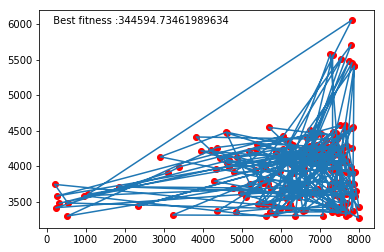

In [13]:
#this is the best solution on the randomized initial population
draw_scatter_plot()

# BEHOLD ! The Genetic Algorithm

FloatProgress(value=0.0, max=1000.0)

------0
Best individual is number 66 with a fitness of 344594.73461989634
Average fitness is 374869.10199607356


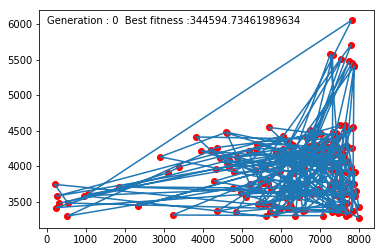

------20
Best individual is number 96 with a fitness of 249910.3868456263
Average fitness is 265238.6480786005


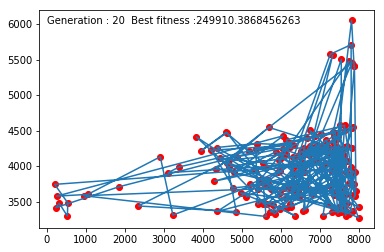

------40
Best individual is number 187 with a fitness of 217276.6162866522
Average fitness is 230899.9666883552


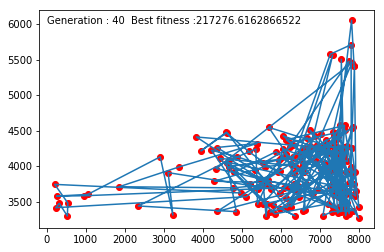

------60
Best individual is number 83 with a fitness of 194127.03064925602
Average fitness is 211747.13116079025


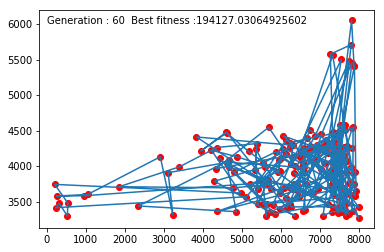

------80
Best individual is number 44 with a fitness of 173143.90600337365
Average fitness is 182360.84525085235


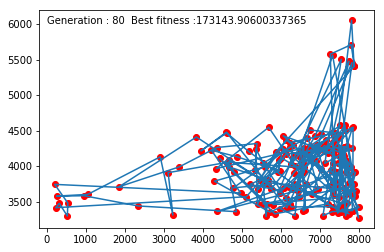

------100
Best individual is number 120 with a fitness of 152298.05930839747
Average fitness is 156667.52248333697


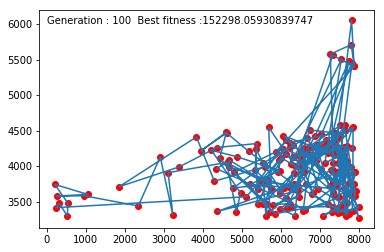

------120
Best individual is number 181 with a fitness of 139181.5925934578
Average fitness is 145075.48033241284


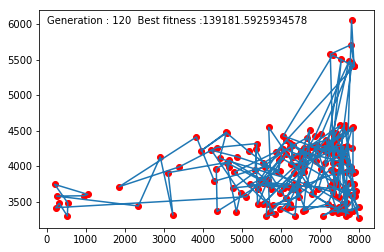

------140
Best individual is number 177 with a fitness of 128609.93463671717
Average fitness is 137347.42450595554


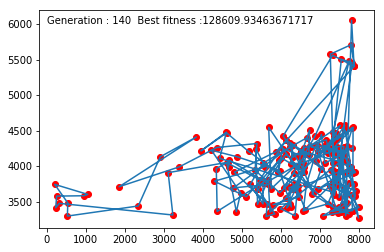

------160
Best individual is number 187 with a fitness of 118059.43052691007
Average fitness is 124682.21056968294


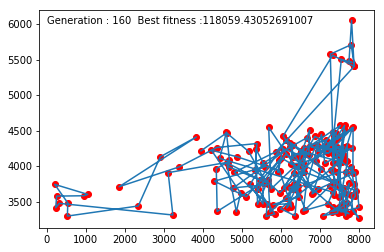

------180
Best individual is number 49 with a fitness of 111072.56005925793
Average fitness is 121511.72187878653


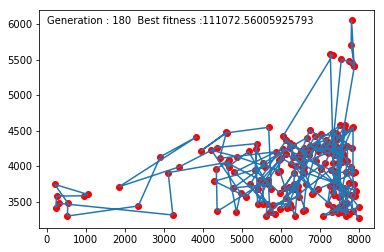

------200
Best individual is number 106 with a fitness of 104168.65453588025
Average fitness is 113439.70684815261


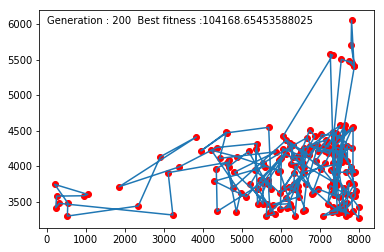

------220
Best individual is number 162 with a fitness of 95140.4832530006
Average fitness is 96763.86243325679


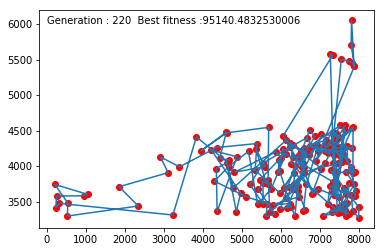

------240
Best individual is number 151 with a fitness of 89162.68724598462
Average fitness is 91664.50104341102


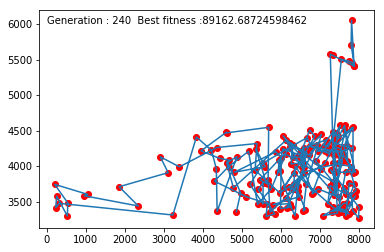

------260
Best individual is number 43 with a fitness of 83782.27385892111
Average fitness is 93478.97188470197


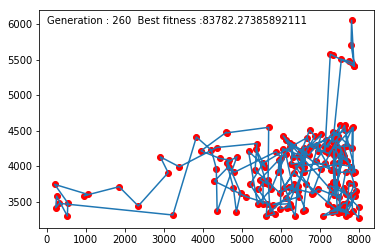

------280
Best individual is number 113 with a fitness of 78424.94466289668
Average fitness is 81326.48745002359


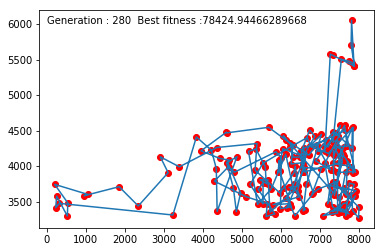

------300
Best individual is number 77 with a fitness of 74322.017340697
Average fitness is 76867.71522623241


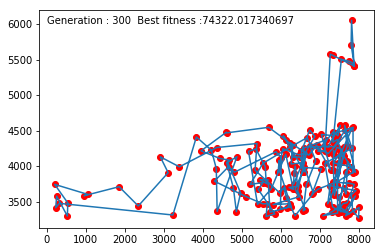

------320
Best individual is number 47 with a fitness of 70672.08423249172
Average fitness is 74807.37017043545


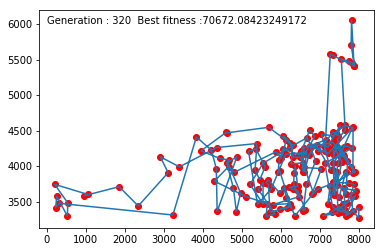

------340
Best individual is number 72 with a fitness of 68578.33356469574
Average fitness is 94127.57406280296


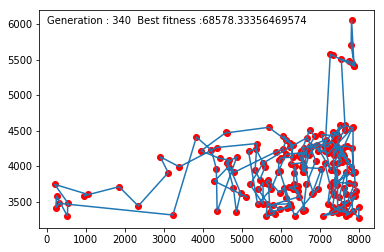

------360
Best individual is number 255 with a fitness of 65621.35686932587
Average fitness is 68624.31177913134


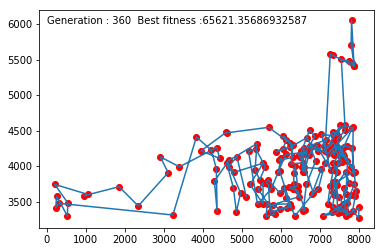

------380
Best individual is number 192 with a fitness of 62772.67863050927
Average fitness is 67021.76436814391


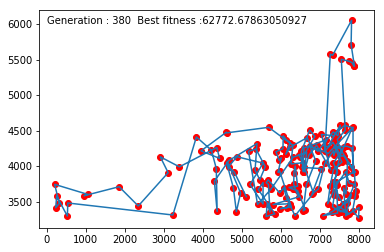

------400
Best individual is number 61 with a fitness of 58924.66427783331
Average fitness is 65725.29546949865


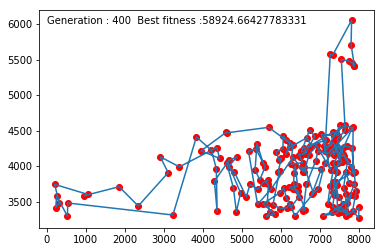

------420
Best individual is number 83 with a fitness of 56628.06831845033
Average fitness is 58355.037959676636


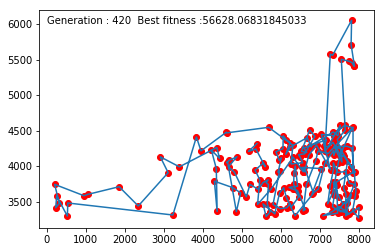

------440
Best individual is number 170 with a fitness of 54011.95051956446
Average fitness is 57261.648114404066


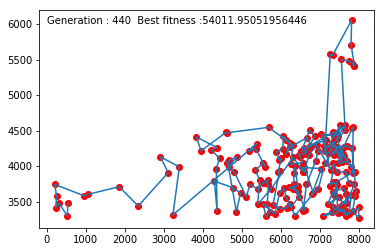

------460
Best individual is number 102 with a fitness of 51171.43339265994
Average fitness is 52856.35803826629


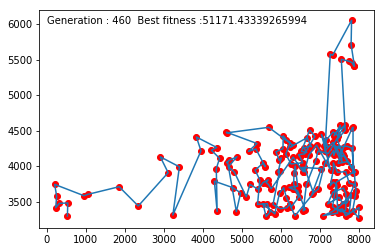

------480
Best individual is number 6 with a fitness of 49334.2896415053
Average fitness is 51100.75162389713


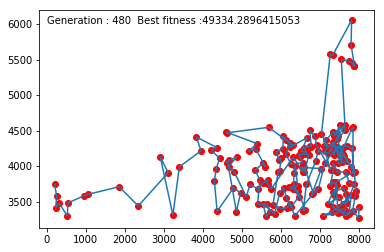

------500
Best individual is number 33 with a fitness of 47532.99555141513
Average fitness is 49578.38498169909


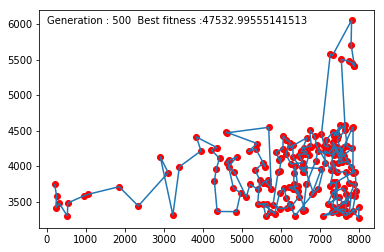

------520
Best individual is number 1 with a fitness of 46449.93727884341
Average fitness is 48070.91627611332


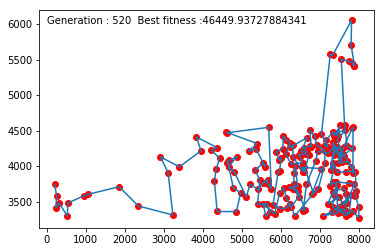

------540
Best individual is number 230 with a fitness of 45385.07375528174
Average fitness is 47260.799039140475


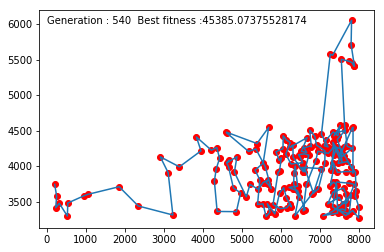

------560
Best individual is number 45 with a fitness of 44467.48308470189
Average fitness is 46173.559510748266


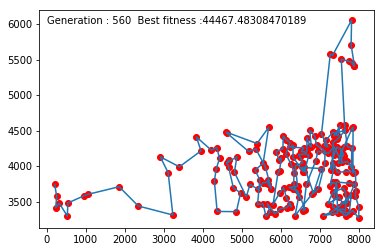

------580
Best individual is number 26 with a fitness of 43569.383381889565
Average fitness is 45370.11472903888


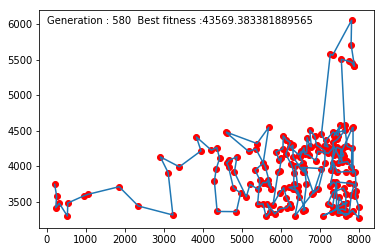

------600
Best individual is number 13 with a fitness of 42616.42337290672
Average fitness is 44300.75586843477


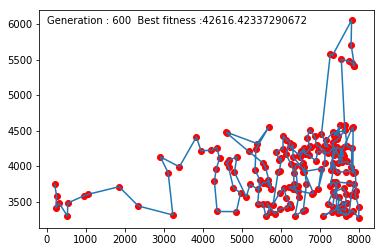

------620
Best individual is number 2 with a fitness of 42156.22197907948
Average fitness is 43793.677311538195


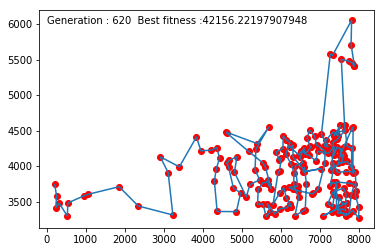

------640
Best individual is number 190 with a fitness of 41489.207275260596
Average fitness is 43310.57571501156


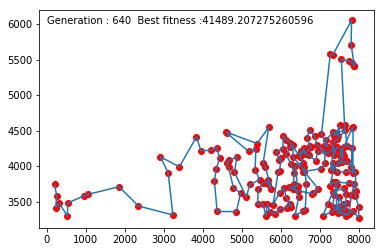

------660
Best individual is number 20 with a fitness of 40710.71526031789
Average fitness is 42467.19986680487


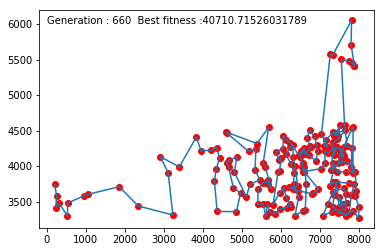

------680
Best individual is number 247 with a fitness of 39501.53825017218
Average fitness is 41022.42805290854


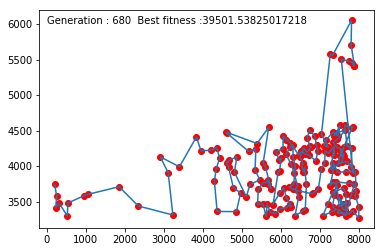

------700
Best individual is number 43 with a fitness of 38909.39334315345
Average fitness is 40578.16717155954


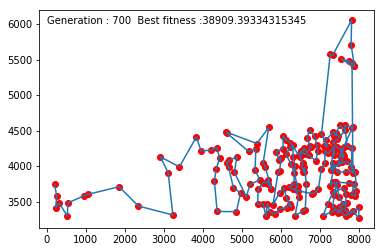

------720
Best individual is number 61 with a fitness of 38517.49167614537
Average fitness is 40314.73182875682


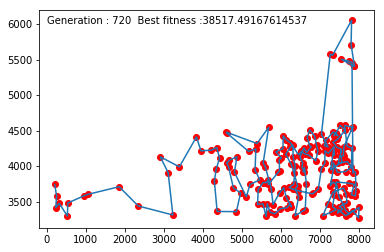

------740
Best individual is number 245 with a fitness of 37902.27980569595
Average fitness is 39386.316557891296


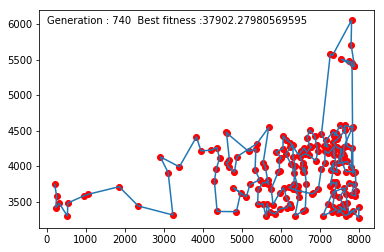

------760
Best individual is number 0 with a fitness of 37451.480023468655
Average fitness is 39076.97189468457


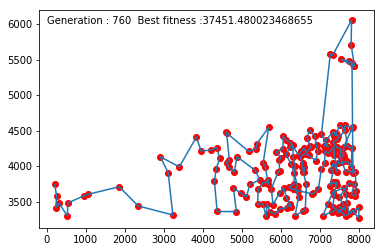

------780
Best individual is number 276 with a fitness of 37098.05477257434
Average fitness is 38517.559837939705


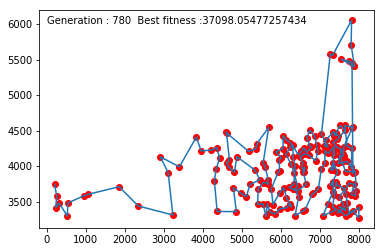

------800
Best individual is number 191 with a fitness of 37011.572906161695
Average fitness is 38575.33940706738


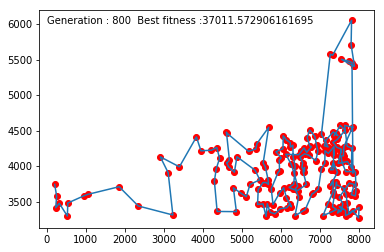

------820
Best individual is number 31 with a fitness of 36773.404886405086
Average fitness is 38560.74062296842


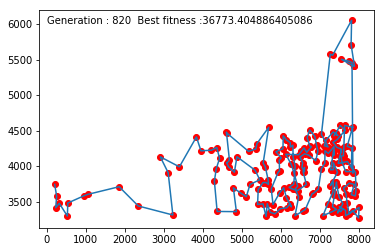

------840
Best individual is number 43 with a fitness of 36374.50271869058
Average fitness is 38170.080940418266


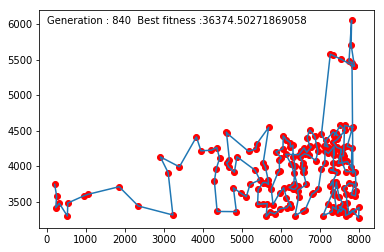

------860
Best individual is number 215 with a fitness of 36198.329533204356
Average fitness is 37609.7593873384


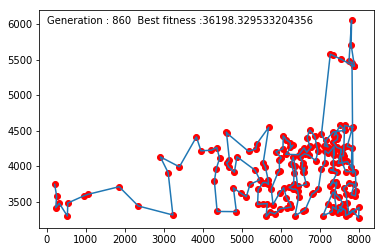

------880
Best individual is number 2 with a fitness of 35810.94052828769
Average fitness is 37844.4859260281


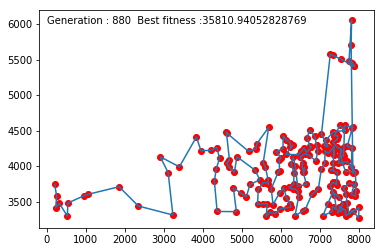

------900
Best individual is number 1 with a fitness of 35649.62552909166
Average fitness is 37155.30278802225


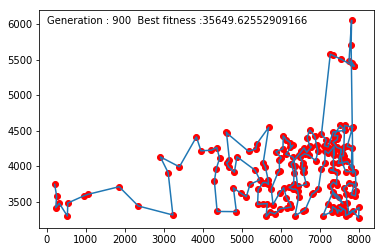

------920
Best individual is number 0 with a fitness of 35464.63404524079
Average fitness is 37249.064148784615


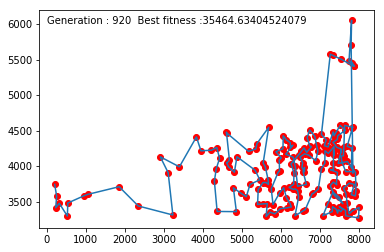

------940
Best individual is number 1 with a fitness of 35275.0434496131
Average fitness is 36870.70519688296


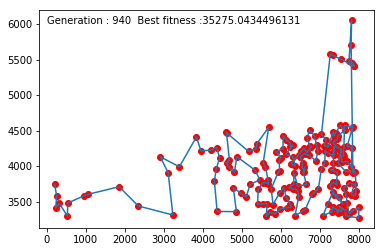

------960
Best individual is number 1 with a fitness of 35178.97361227347
Average fitness is 36543.921780025594


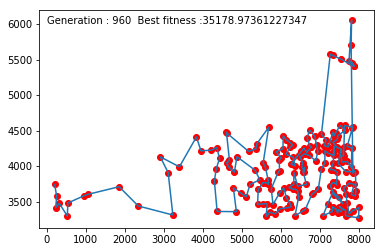

------980
Best individual is number 1 with a fitness of 34926.03574720137
Average fitness is 36552.18845292754


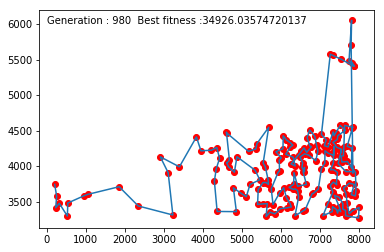

In [14]:
#initialize the list of boxplot values
bxplot=list()
bxplot[:]=[]

#max_iterations=max_iterations

#this is used to show a progressbar as our GA runs
f = FloatProgress(min=0, max=max_iterations) # instantiate the bar
display(f) # display the bar
f.value=0

#The main GA loop
for j in range(0,max_iterations):
    #initialize empty population
    tmp_population=np.zeros((nindividuals,ncities),dtype=int)
    
    bxpltseries=list()
    bxpltseries[:]=[]
 
    #Populate the temporary population
    for i in range(0,int(nindividuals/2)):
        tmpa = tournament_selection(population,tournamentsize)
        tmpa_fitness = calculate_fitness(tmpa)

        tmpb = tournament_selection(population,tournamentsize)
        tmpb_fitness = calculate_fitness(tmpb)
        
        #Crossover or Reproduction
        if cx_probability>random():
            tmpc,tmpd=crossover(tmpa,tmpb)
        else:
            tmpc,tmpd=tmpa[:],tmpb[:]
        
        #this is used to create a boxplot in the end of the runs
        bxpltseries.append(tmpa_fitness)
        bxpltseries.append(tmpb_fitness)

        #Mutation
        if mx_probability>random():
            tmp2=mutate(tmpc)
            tmp_population[i]=tmp2[:]
        
            tmp3=mutate(tmpd)
            tmp_population[int(nindividuals/2)+i]=tmp3[:]
        
        else:
            tmp_population[i]=tmpc[:]
            tmp_population[int(nindividuals/2)+i]=tmpd[:]
    
    
    #change here to make the plots more or less frequent
    # j%5 prints a plot every 5 generations, j%10 prints one every 10 generations
    if j%20==0:
        print('------' + str(j))
        bxplot.append(bxpltseries)
        draw_scatter_plot('Generation : ' + str(j))
    
    population=tmp_population[:]
    f.value += 1
    
f.close() #hide progressbar

### Visualize the resulting fitnesses

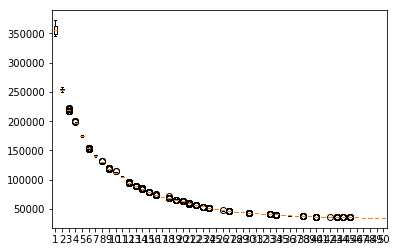

In [15]:
plt.pyplot.boxplot(bxplot)

plt.pyplot.show()

The figure above shows a typical hockeystick plot.

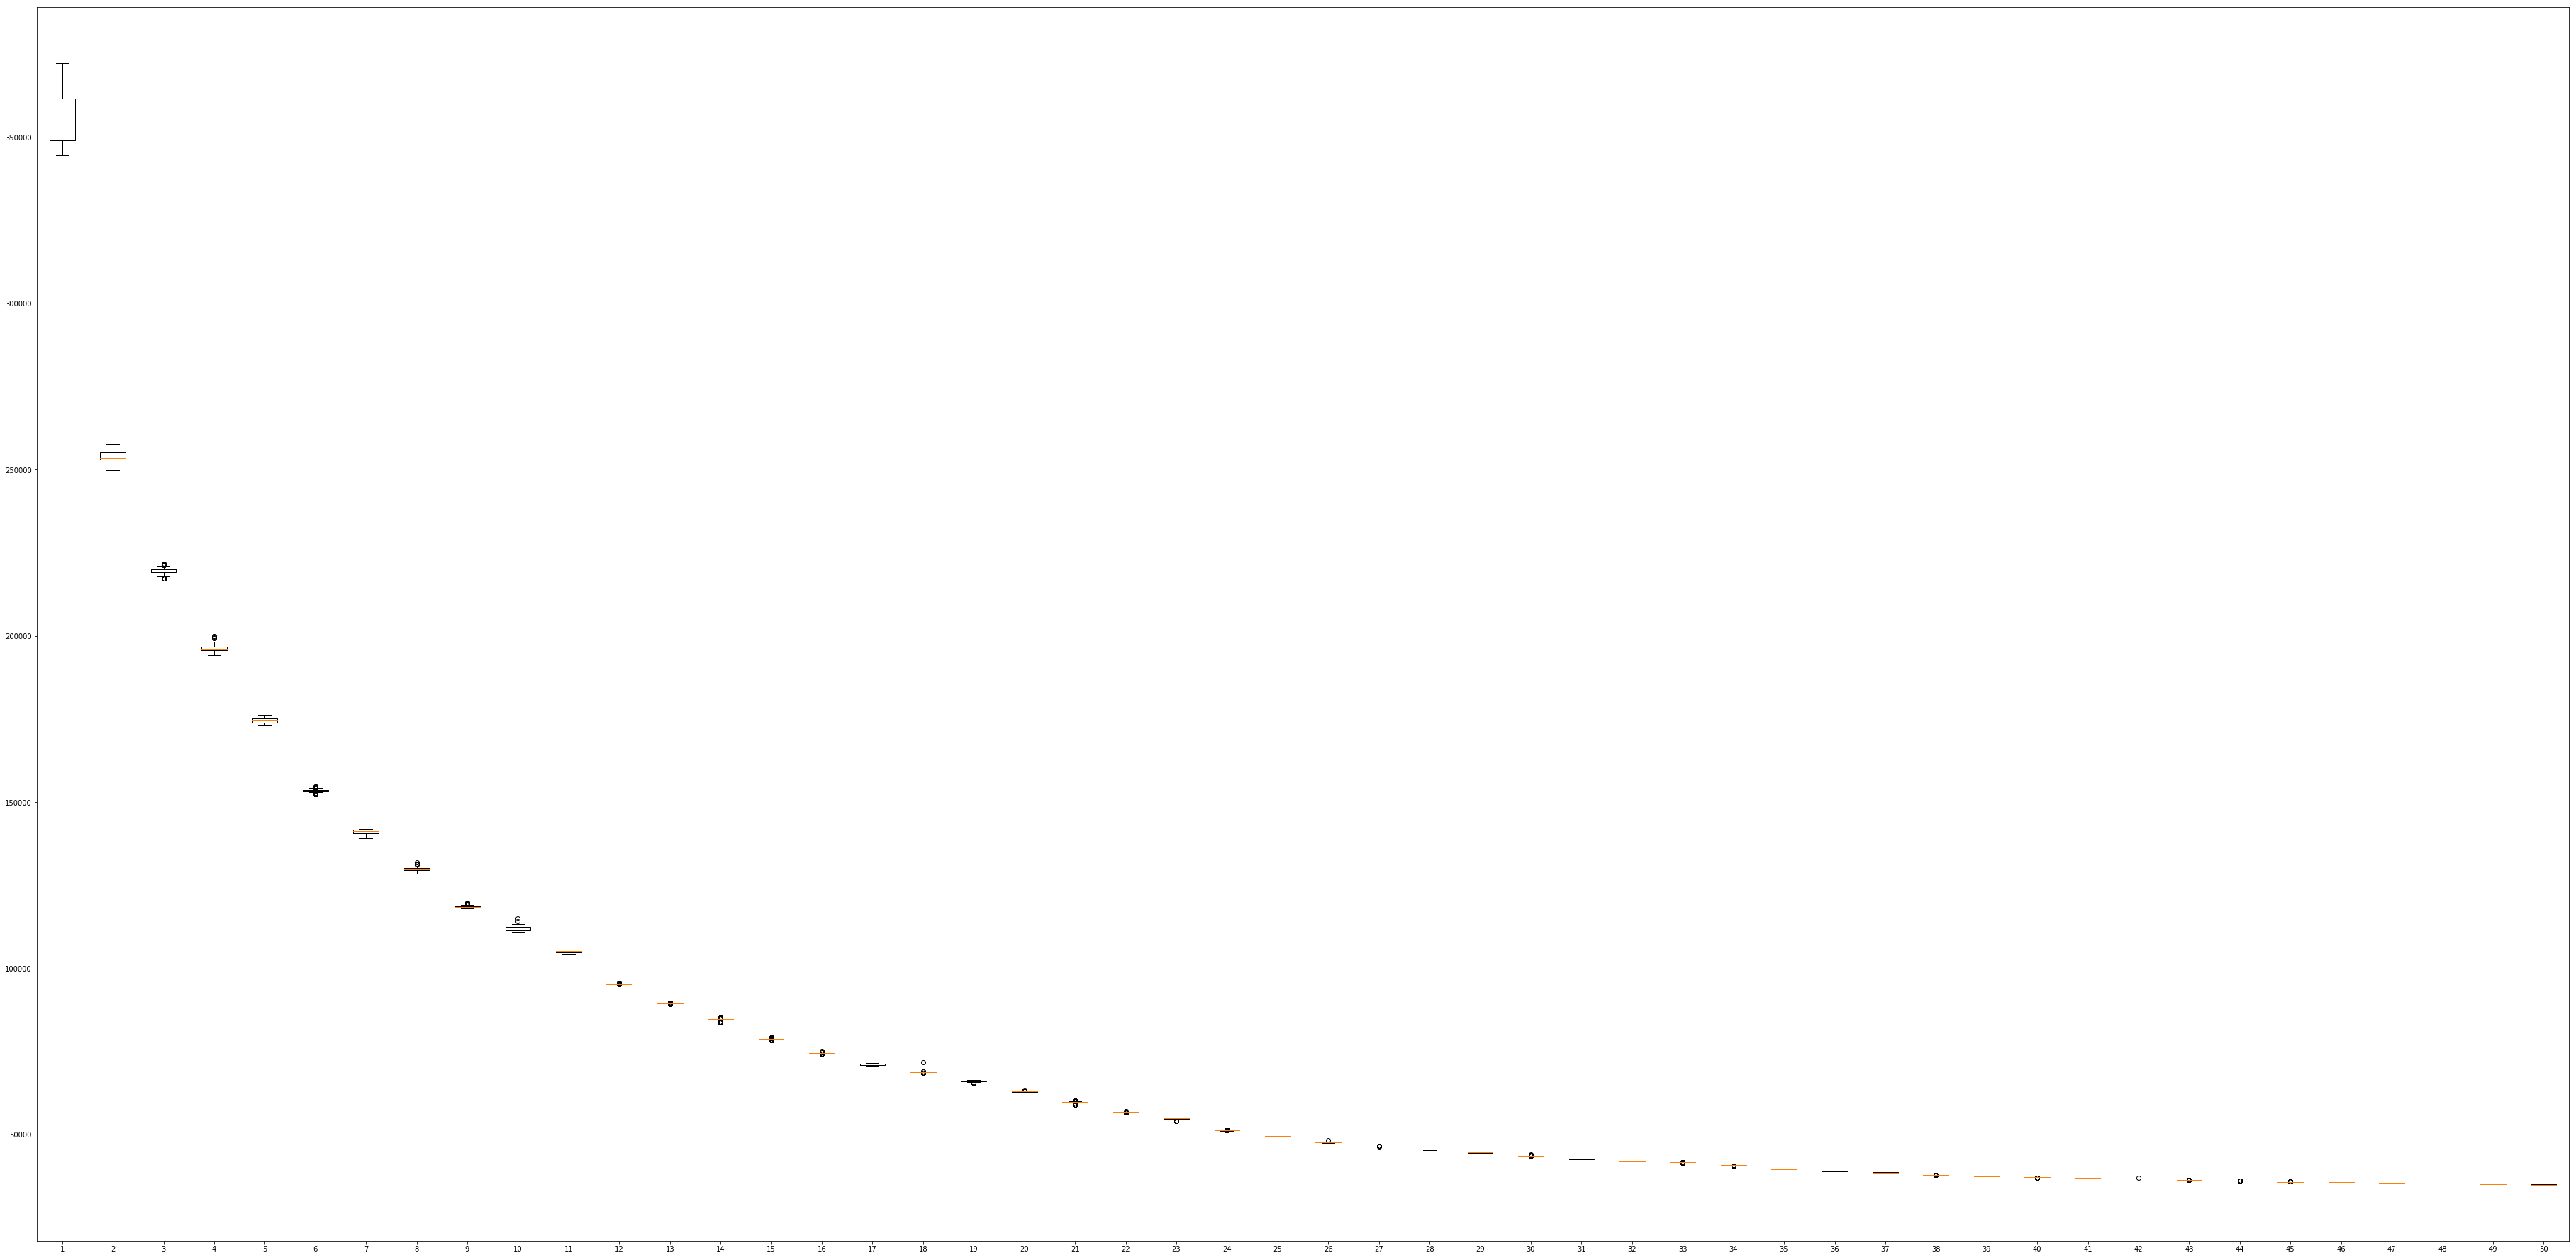

In [16]:

#make this image BIG
plt.rcParams["figure.figsize"]=(64,32)
plt.pyplot.boxplot(bxplot)

plt.pyplot.show()